# Step 1: About the Dataset

This is a simulated dataseet made for teaching regression containing **3 Indepencent variables**

$x_1$ : Gender

$x_2$ : Age

$x_3$ : Estimated Salary

and a dependent variable $y$ is Purchased.

The dataset is stored in a CSV file called Social_Network_Ads.csv.



# Step 2: Reading Data

First, we will read the data from the CSV file using pandas and then preview it.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

#reading the csv file using pandas
df= pd.read_csv('Social_Network_Ads.csv', na_values='-')
#dropping unused column
df=df.drop(['User ID'], axis=1)

#showing first 5 data
df.head()


,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


# Step 3: Shape of Dataset

In [2]:
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 400
Number of columns: 4


# Step 4: Information of Dataset

In [3]:
df.isnull().sum() #untuk memunculkan jumlah data yang kosong pada setiap kolom

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [5]:
df.head(3)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0


In [6]:
df.tail(3)

,Gender,Age,EstimatedSalary,Purchased
397,Female,50,20000,1
398,Male,36,33000,0
399,Female,49,36000,1


# Step 5: Exploratory data analysis (EDA)

In [7]:
#Descriptive Statistics

df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


**Explanation 1**

Based on the data above, the average age of individuals in the sample data is 37.7 years with a standard deviation of 10.5. The youngest age in the sample is 18, and the oldest age is 60. The average salary in the sample is $69,742 with a standard deviation of $34,096. The minimum salary in the sample is $15,000, while the maximum salary is $150,000.

In [8]:
df.groupby('Purchased').count()

,Gender,Age,EstimatedSalary
Purchased,,,
0,257,257,257
1,143,143,143


In [9]:
df.groupby('Purchased').mean()

,Age,EstimatedSalary
Purchased,,
0,32.793774,60544.747082
1,46.391608,86272.727273


In [10]:
df.groupby('Purchased').median()

,Age,EstimatedSalary
Purchased,,
0,34.0,61000.0
1,47.0,90000.0


In [11]:
df.groupby('Purchased').std()

,Age,EstimatedSalary
Purchased,,
0,7.985844,24351.570102
1,8.612172,42064.200064


## Data Visualization: Boxplot 

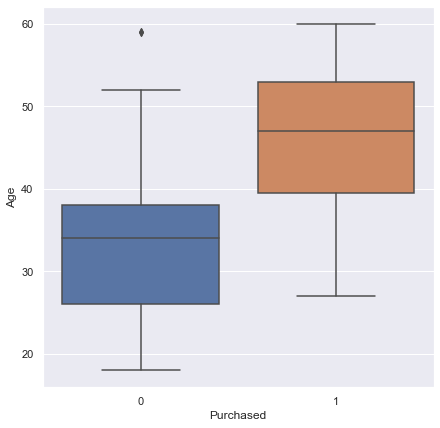

In [12]:
fig, ax = plt.subplots(figsize=(7,7))
sns.boxplot(data=df, x='Purchased', y='Age')
plt.show()

**Explanation 2**

From the visualization of the age boxplot, we can see that the maximum point of Purchased 0 is lower than the maximum point of Purchased 1. The minimum point of Purchased 0 is also lower than the minimum point of Purchased 1. It is also noticeable that the interquartile range (IQR) of the age for Purchased 0 lies between approximately 25 and 40, while the IQR of the age for Purchased 1 lies between approximately 40 and 55.


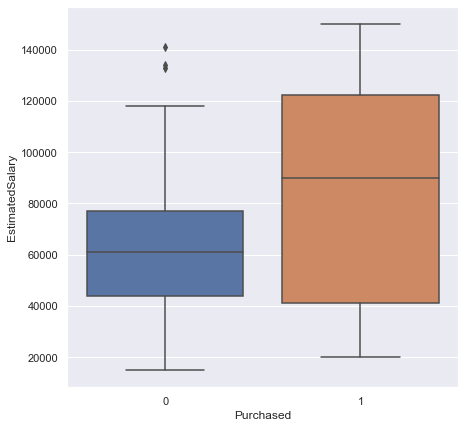

In [13]:
fig, ax = plt.subplots(figsize=(7,7))
sns.boxplot(data=df, x='Purchased', y='EstimatedSalary')
plt.show()

**Explanation 3**

From the visualization of the Estimated Salary boxplot, we can see that the maximum point of Purchased 0 is lower than the maximum point of Purchased 1. The minimum point of Purchased 0 is also lower than the minimum point of Purchased 1. There are outliers in the not purchased category. It is also noticeable that the interquartile range (IQR) of the salary for Purchased 0 lies between approximately 40,000 and 80,000, while the IQR of the salary for Purchased 1 lies between approximately 40,000 and 120,000. This indicates that the spread of salary for Purchased 1 is wider than the spread for Purchased 0.

## Data Visualization: Histogram

<AxesSubplot:xlabel='Gender', ylabel='count'>

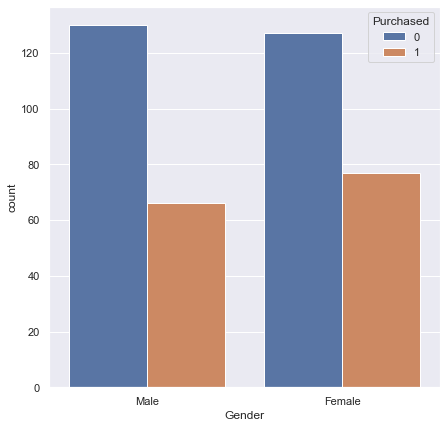

In [14]:
fig, ax = plt.subplots(figsize=(7,7))
sns.countplot(data=df, x='Gender', hue='Purchased')

**Explanation 4**

The visualization of the gender histogram shows that in both gender categories, the number of Purchased 0 is higher than Purchased 1. It can also be observed that the proportion of people who purchased or did not purchase is similar across both genders.

In [15]:
df.groupby('Gender')['Purchased'].value_counts(normalize=True)

Gender  Purchased
Female  0            0.622549
        1            0.377451
Male    0            0.663265
        1            0.336735
Name: Purchased, dtype: float64

In [16]:
df.groupby(['Gender','Purchased'])['Gender'].count()

Gender  Purchased
Female  0            127
        1             77
Male    0            130
        1             66
Name: Gender, dtype: int64

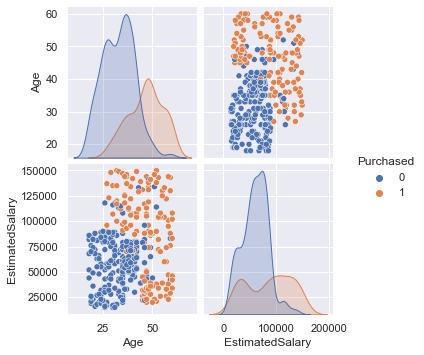

In [17]:
sns.pairplot(data=df, hue='Purchased')
plt.show()

**Explanation 5**

Based on the visualization, we can see that older individuals tend to make purchases, while younger individuals tend not to buy. In the estimated salary plot, a trend can also be observed where individuals with higher salaries do not have a specific tendency, while those with lower salaries have a higher tendency not to purchase.

# Step 6: Variable Correlation

In [18]:
df.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


<AxesSubplot:>

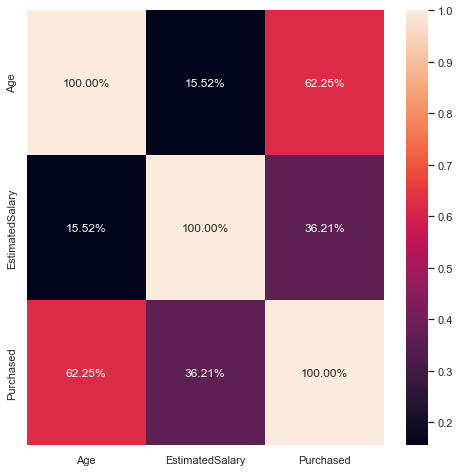

In [19]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, fmt='.2%')

**Explanation 6**

From the heatmap we can see that "Purchased" has a relatively high correlation with "Age" compared to "EstimatedSalary". "EstimatedSalary" and "Age" have a low correlation.

# Step 7: Modeling - Logistic Regression

Before modeling, we replace categorical variables to numerical.

Gender: Male = 0, Female = 1

In [20]:
#Copying a new datafram so original data remains intact
dfnew = df.copy

replacements = {'Gender': {'Male': 0, 'Female': 1},}

df.replace(replacements, inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


Split the dataframe into training and testing data. test_size=0.25 means the data will be split with the composition 75% training and 25% testing data. random_state=11 is used for a reproducible dataset. It can be passed by any integer.

In [21]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [22]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.25, random_state=11)
train_index = train.index
test_index = test.index

In [24]:
import statsmodels.api as sm

y_train = train['Purchased']
X_train = train[['Age','Gender','EstimatedSalary']]
X_train = sm.add_constant(X_train)

model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
logreg=model.fit()

In [25]:
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  300
Model:                            GLM   Df Residuals:                      296
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -101.93
Date:                Sat, 10 Jun 2023   Deviance:                       203.87
Time:                        20:08:32   Pearson chi2:                     366.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4680
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -12.8949      1.589     -8.113      0.000     -16.010      -9.780
Age                 0.2457      0.032      7.622      0.000       0.183       0.309
Gender             -0.6709      0.362     -1.855      0.064      -1.380       0.038
EstimatedSalary  3.899e-05   6.32e-06      6.172      0.000    2.66e-05    5.14e-05
===================================================================================
"""

**Explanation 7**

From the p-value  results, it can be stated that Age, Gender, and EstimatedSalary are significant factors in determining whether someone will make a purchase or not. For every one-point change in Age, there will be a change in the probability of Purchase by 0.25. For every one-point change in Gender, there will be a change in the probability of purchase by 0.67. For every one-point change in EstimatedSalary, there will be a change in the probability of purchase by 3.9e-05. Age and EstimatedSalary are positively correlated with the Purchase rate, while Gender is inversely correlated with the purchase rate.

# Step 8: Prediction of Training Data

In [26]:
train_pred = logreg.predict(X_train)

In [27]:
train['Purchased_Rate'] = train_pred
train.head()

,Gender,Age,EstimatedSalary,Purchased,Purchased_Rate
234,1,38,112000,0,0.534355
70,0,25,80000,0,0.025749
82,0,20,49000,0,0.002305
284,0,48,141000,0,0.987826
52,1,29,83000,0,0.039002


In [28]:
train[['Purchased','Purchased_Rate']].groupby('Purchased').describe()

Purchased_Rate                                                    \
                   count      mean       std       min       25%       50%   
Purchased                                                                    
0                  191.0  0.168996  0.218323  0.000310  0.009734  0.070644   
1                  109.0  0.703869  0.268970  0.160909  0.482911  0.809088   

                               
                75%       max  
Purchased                      
0          0.257451  0.987826  
1          0.949523  0.999061

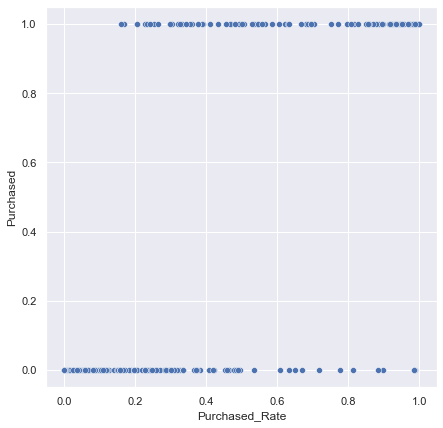

In [29]:
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=train, x='Purchased_Rate',y='Purchased')
plt.show()

In [30]:
cut_off = 0.35
train['Prediction']= np.where(train['Purchased_Rate'] < cut_off, 0, 1)
train.head()

,Gender,Age,EstimatedSalary,Purchased,Purchased_Rate,Prediction
234,1,38,112000,0,0.534355,1
70,0,25,80000,0,0.025749,0
82,0,20,49000,0,0.002305,0
284,0,48,141000,0,0.987826,1
52,1,29,83000,0,0.039002,0


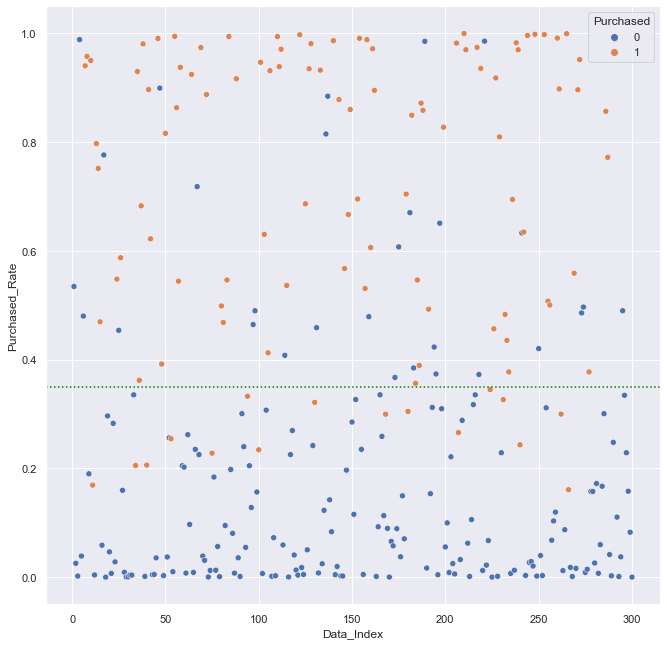

In [31]:
fig, ax = plt.subplots(figsize=(11,11))
train['Data_Index'] = range(1, len(train)+1)
sns.scatterplot(data=train, x='Data_Index',y='Purchased_Rate', hue='Purchased')
plt.axhline(y = 0.35, color = 'green', linestyle= ':')
plt.show()

**Explanation 8**

We can observe the results of the trained model with the scatter plot. Overall, the decisions made with a cut-off of 0.35 are mostly correct. It can be seen that the blue points, indicating non-purchases, are mostly below the cut-off line. However, it can also be observed that there are some data points where the predicted purchases do not align with the given data.



## Confusion Matrix

In [32]:
cm_train = pd.crosstab(train['Purchased'], train['Prediction'])
cm_train

Prediction,0,1
Purchased,,
0,162,29
1,16,93


In [33]:
TN_train = cm_train.iloc[0,0]
TP_train = cm_train.iloc[1,1]
FN_train = cm_train.iloc[1,0]
FP_train = cm_train.iloc[0,1]

accuracy_train = (TN_train + TP_train)/(TN_train + FP_train + FN_train + TP_train)
sensitivity_train = TP_train / (TP_train + FN_train)
precision_train = TP_train / (TP_train + FP_train)

print('The model accuracy accuracy of training data:',f'{accuracy_train: 0.2%}')
print('The model sensitivity of training data:', f'{sensitivity_train: 0.2%}')
print('The model precision of training data:', f'{precision_train: 0.2%}')

The model accuracy accuracy of training data:  85.00%
The model sensitivity of training data:  85.32%
The model precision of training data:  76.23%


# Step 9: Prediction of Testing Data

In [34]:
X_test = test[['Age','Gender','EstimatedSalary']]
X_test = sm.add_constant(X_test)

test_pred = logreg.predict(X_test)

In [35]:
test['Purchased_Rate'] = test_pred
test.head()

,Gender,Age,EstimatedSalary,Purchased,Purchased_Rate
276,0,38,71000,0,0.312157
274,1,57,26000,1,0.810442
164,1,33,69000,0,0.059112
393,0,60,42000,1,0.970249
136,1,20,82000,0,0.004258


In [36]:
test['Prediction'] = np.where(test['Purchased_Rate'] < cut_off, 0, 1)
test.head()

,Gender,Age,EstimatedSalary,Purchased,Purchased_Rate,Prediction
276,0,38,71000,0,0.312157,0
274,1,57,26000,1,0.810442,1
164,1,33,69000,0,0.059112,0
393,0,60,42000,1,0.970249,1
136,1,20,82000,0,0.004258,0


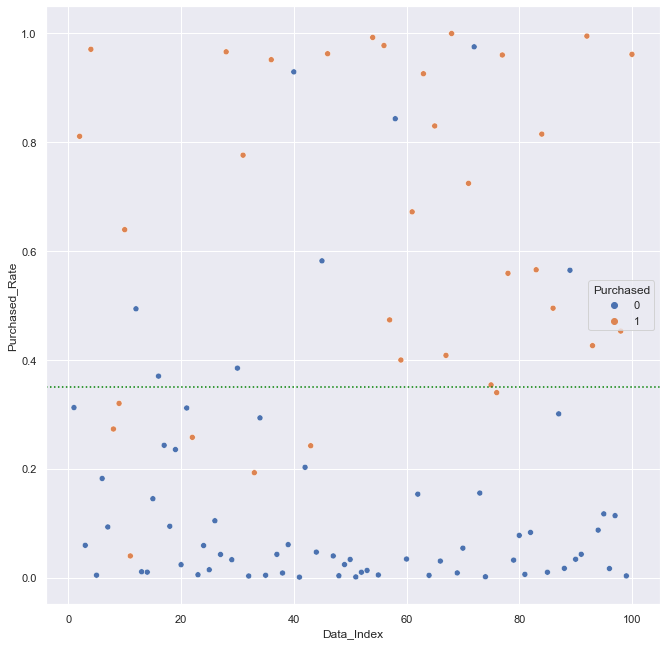

In [37]:
fig, ax = plt.subplots(figsize=(11,11))
test['Data_Index'] = range(1, len(test) + 1)
sns.scatterplot(data=test, x='Data_Index',y='Purchased_Rate', hue='Purchased')
plt.axhline(y = 0.35, color = 'green', linestyle= ':')
plt.show()

**Explanation 9**

From the scatter plot above, we can see the results of the test model. Overall, the decisions made with a cut-off of 0.35 are mostly correct. In the graph above, the orange points indicating purchases are mostly above the cut-off line, while the blue points indicating non-purchases are mostly below the cut-off line. However, it can be observed that there are some data points where the predicted purchases do not align with the given data. This indicates that the model is quite accurate but not 100% perfect.

In [38]:
cm_test = pd.crosstab(test['Purchased'], test['Prediction'])
cm_test

Prediction,0,1
Purchased,,
0,58,8
1,7,27


In [39]:
TN_test = cm_test.iloc[0,0]
TP_test = cm_test.iloc[1,1]
FN_test = cm_test.iloc[1,0]
FP_test = cm_test.iloc[0,1]

accuracy_test = (TN_test + TP_test)/(TN_test + FP_test + FN_test + TP_test)
sensitivity_test = TP_test / (TP_test + FN_test)
precision_test = TP_test / (TP_test + FP_test)

print('The model accuracy accuracy of testing data:',f'{accuracy_test: 0.2%}')
print('The model sensitivity of testing data:', f'{sensitivity_test: 0.2%}')
print('The model precision of testing data:', f'{precision_test: 0.2%}')

The model accuracy accuracy of testing data:  85.00%
The model sensitivity of testing data:  79.41%
The model precision of testing data:  77.14%


In [40]:
metrics=['Accuracy','Sensitivity','Precision']
performance_train=[accuracy_train, sensitivity_train, precision_train]
performance_test=[accuracy_test, sensitivity_test, precision_test]
performance1=pd.DataFrame({'Metrics':metrics,'Training Data':performance_train,'Testing Data':performance_test})
performance1.style.format({'Training Data':'{:,.2%}','Testing Data':'{:,.2%}'})

,Metrics,Training Data,Testing Data
0,Accuracy,85.00%,85.00%
1,Sensitivity,85.32%,79.41%
2,Precision,76.23%,77.14%


**Explanation 10**

The test accuracy indicates the overall performance of the model created. From the model results, both training and test data have the same accuracy. This means that the model can make predictions as expected. Sensitivity measures how accurately the model can correctly classify true positive data as positive results. In this model, the sensitivity in training is higher than the sensitivity in testing data. Precision is the closeness of the predicted value to the actual value. In this model, the precision in testing data is higher than the precision in training data.